In [3]:
import pandas as pd

data=pd.read_csv("D:\python\git\gradient descent from scratch\clean_weather.csv")
data=data.ffill()

data.head(5)

,Unnamed: 0,tmax,tmin,rain,tmax_tomorrow
0,1970-01-01,60.0,35.0,0.0,52.0
1,1970-01-02,52.0,39.0,0.0,52.0
2,1970-01-03,52.0,35.0,0.0,53.0
3,1970-01-04,53.0,36.0,0.0,52.0
4,1970-01-05,52.0,35.0,0.0,50.0


In [4]:
data.shape

(13509, 5)

<Axes: xlabel='tmax', ylabel='tmax_tomorrow'>

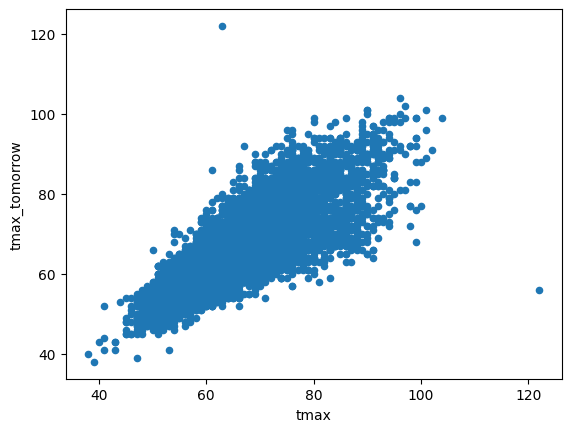

In [5]:
data.plot.scatter("tmax","tmax_tomorrow")

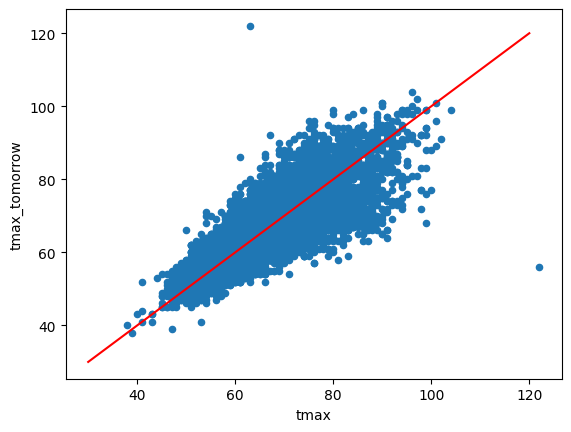

In [6]:
import matplotlib.pyplot as plt

data.plot.scatter("tmax","tmax_tomorrow")
plt.plot([30,120],[30,120],'red')

In [7]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

lr.fit(data[['tmax']],data['tmax_tomorrow'])

LinearRegression()

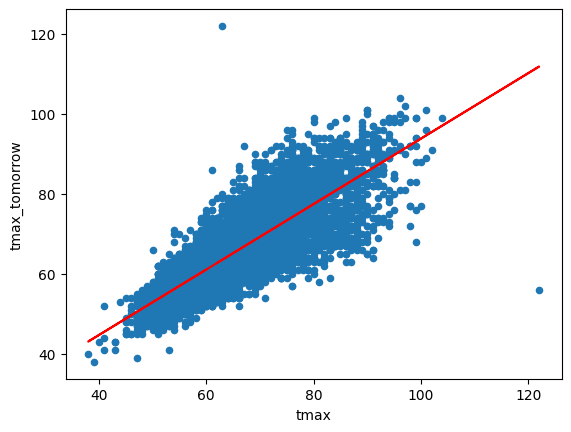

In [8]:
data.plot.scatter("tmax","tmax_tomorrow")
plt.plot(data["tmax"],lr.predict(data[['tmax']]),"red")

In [9]:
print(f"weights:{lr.coef_[0]:.2f}")
print(f"bias : {lr.intercept_:.2f}")

weights:0.82
bias : 11.99


In [10]:
.82*80+11.99

77.58999999999999

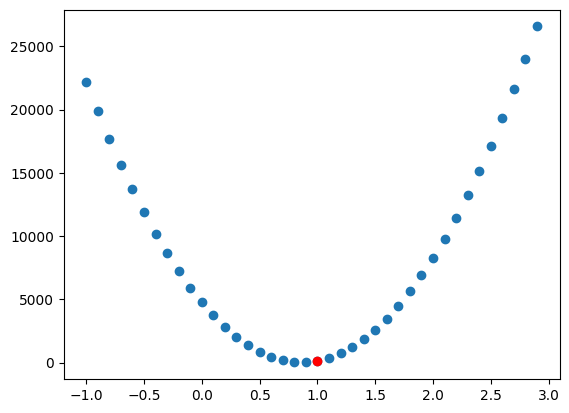

In [11]:
import numpy as np

loss=lambda w,y:((w*80+11.99) - y)**2

y=81
ws=np.arange(-1,3,.1)
losses=loss(ws,y)

plt.scatter(ws,losses)
plt.plot(1,loss(1,y),'ro')

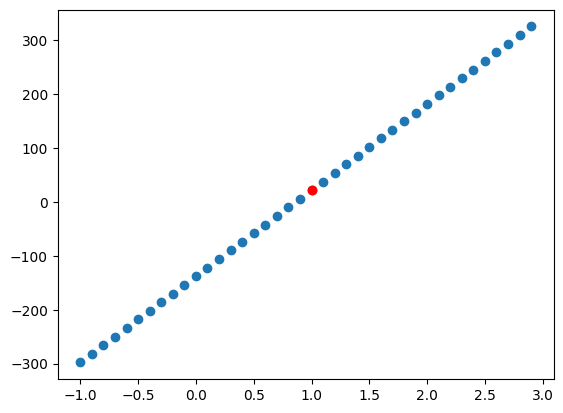

In [12]:
gradient= lambda w,y:((w*80+11.99)-y)*2
gradients=gradient(ws,y)

plt.scatter(ws,gradients)
plt.plot(1,gradient(1,y),'ro')

In [13]:
print(f"Updated bias = {(((80*1)+11.99)-81)*2}")

Updated bias = 21.97999999999999


In [14]:
print(f"Updated weight = {21.98*80}")

Updated weight = 1758.4


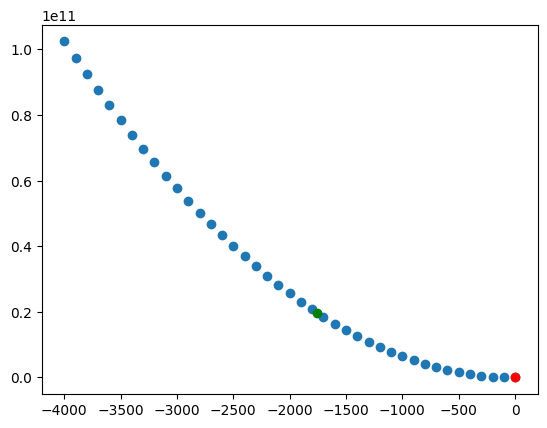

In [15]:
ws=np.arange(-4000,100,100)
losses=loss(ws,y)

plt.scatter(ws,losses)

plt.plot(1,loss(1,y),'ro')
new_weight=1-gradient(1,y)*80
plt.plot(new_weight,loss(new_weight,y),'go')

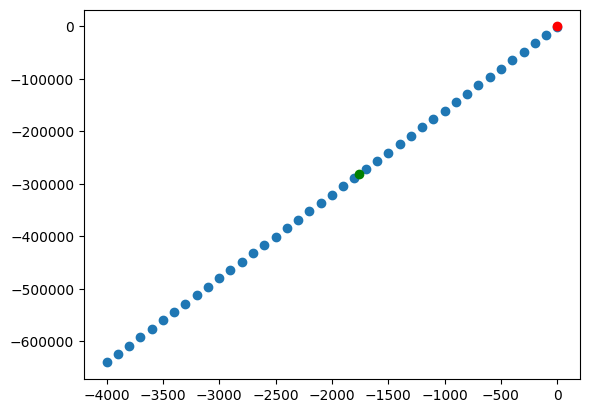

In [16]:
gradients=gradient(ws,y)

plt.scatter(ws,gradients)
plt.plot(1,gradient(1,y),'ro')
plt.plot(new_weight,gradient(new_weight,y),'go')

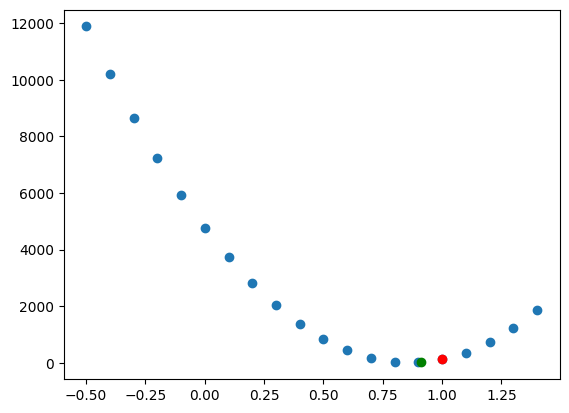

In [17]:
ws=np.arange(-.5,1.5,.1)
losses=loss(ws,y)

plt.scatter(ws,losses)

plt.plot(1,loss(1,y),'ro')
lr=5e-5
new_weight=1-lr*gradient(1,y)*80
plt.plot(new_weight,loss(new_weight,y),'go')

In [18]:
new_weight

0.91208

In [20]:
predictors=["tmax","tmin","rain"]
target="tmax_tomorrow"

np.random.seed(0)
split_data=np.split(data,[int(.7*len(data)),int(.85*len(data))])
(train_x,train_y),(valid_x,valid_y),(test_x,test_y)=[[d[predictors].to_numpy(),d[[target]].to_numpy()]for d in split_data]

c:\Users\bmbar\anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [21]:
import math

def init_params(predictors):
    np.random.seed(0)
    weights=np.random.rand(predictors,1)
    biases=np.ones((1,1))
    return [weights,biases]

In [22]:
init_params(3)

[array([[0.5488135 ],
        [0.71518937],
        [0.60276338]]),
 array([[1.]])]

In [23]:
def forward(params,x):
    weights,biases=params
    prediction=x@weights+biases
    return prediction

In [24]:
def mse(actual,predicted):
    return np.mean((actual-predicted)**2)

def mse_grad(actual,predicted):
    return predicted-actual

In [26]:
def backward(params,x,lr,grad):
    w_grad=(x.T/x.shape[0])@grad
    b_grad=np.mean(grad,axis=0)

    params[0]-=w_grad*lr
    params[1]-=b_grad*lr
    return params

In [28]:
lr=1e-4
epochs=1000

params=init_params(train_x.shape[1])

for i  in range(epochs):
    predictions=forward(params,train_x)
    grad=mse_grad(train_y,predictions)

    params=backward(params,train_x,lr,grad)

    if i%100==0:
        predictions=forward(params,valid_x)
        valid_loss=mse(valid_y,predictions)

        print(f"Epoch {i} loss: {valid_loss}")

Epoch 0 loss: 31.564020597420274
Epoch 100 loss: 28.46868220995441
Epoch 200 loss: 26.755045661039226
Epoch 300 loss: 25.56802455131577
Epoch 400 loss: 24.74121191441513
Epoch 500 loss: 24.161659223453068
Epoch 600 loss: 23.75253879499795
Epoch 700 loss: 23.461459347685857
Epoch 800 loss: 23.252585905937742
Epoch 900 loss: 23.101320877827668


In [29]:
params

[array([[0.75242117],
        [0.29826198],
        [0.59333217]]),
 array([[1.00846507]])]